<a href="https://www.kaggle.com/code/shijun666/titanic-competition-sj-1?scriptVersionId=200283466" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data processing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## import data 

In [2]:
#load train and test data set

Train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
Test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

Train_data.head()

                       

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Go through the dataset
Train_data.describe()

## for input in ML, Pclass, Age, SibSp, Parch, Fare are numeric
## Name, sex, Ticket, Cabin and Embarked are characters

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# check NA or empty value
Train_data.isna().sum()

## age, cabin, embarked have missing values
## age NA can be replace with mean
## Cabin has 687 NAs out of 891 entries, this column can be depleted. 
### However, missing value in Cabin itself might be correlated with survival, this needs to be tested
## embarked only has two NA, limited impacts

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## EDA of the train data set

In [5]:
# import library for analysis and plotting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
Train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

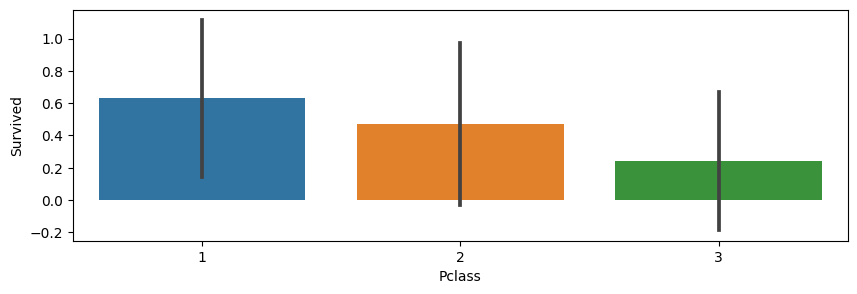

In [7]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='Pclass',y='Survived',estimator='mean', errorbar=('sd'))

plt.show() 
## There is correlation of Pclass and survival

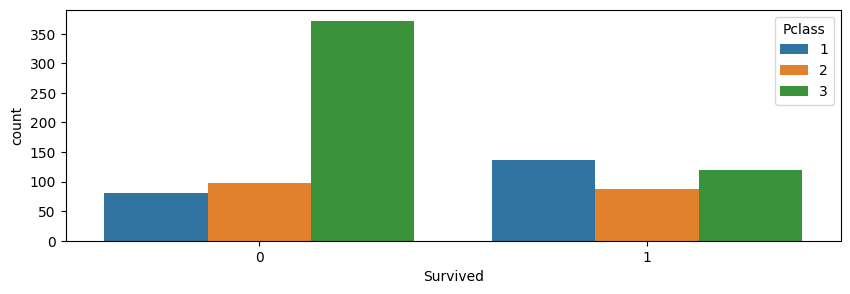

In [8]:
plt.figure(figsize=(10, 3))

sns.countplot(x='Survived',data=Train_data, hue='Pclass')

plt.show() 
## There is correlation of Pclass and survival

In [9]:
Train_data['Name'].value_counts()
#891 unique names, very unlikely to correlate with survival

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

In [10]:
## the tiles from the names might predict survival
#extract the titles from name
Train_data['Title']=Train_data.Name.str.extract(r'([A-Za-z]+)\.', expand=False)
Train_data.Title = Train_data.Title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Major', 
                                     'Rev', 'Sir', 'Jonkheer', 'Mlle','Ms','Mme'], 'Other')
Train_data['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      20
Dr          7
Name: count, dtype: int64

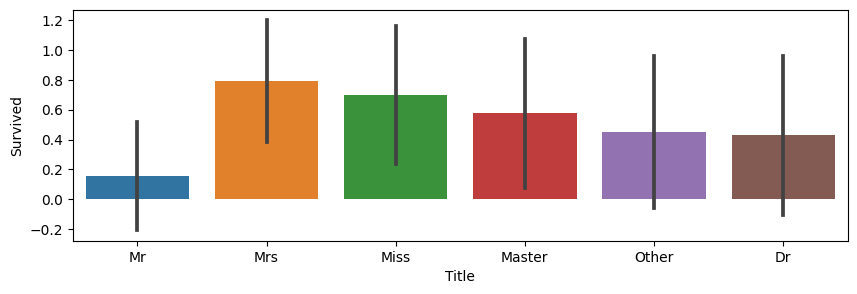

In [11]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='Title',y='Survived',estimator='mean', errorbar=('sd'))

plt.show() 
## oh.....Mr.....

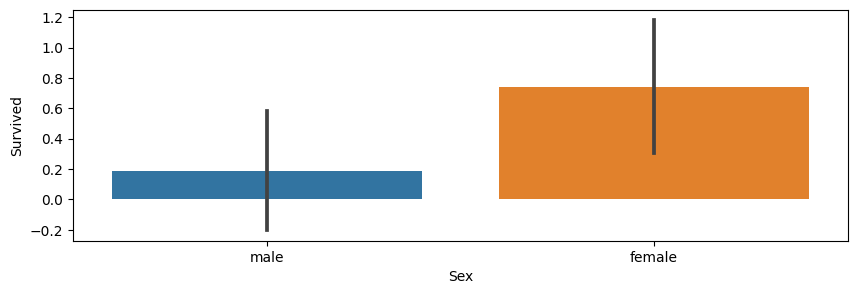

In [12]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='Sex',y='Survived',estimator='mean', errorbar=('sd'))

plt.show() 
## Strong correlation between gender and survival

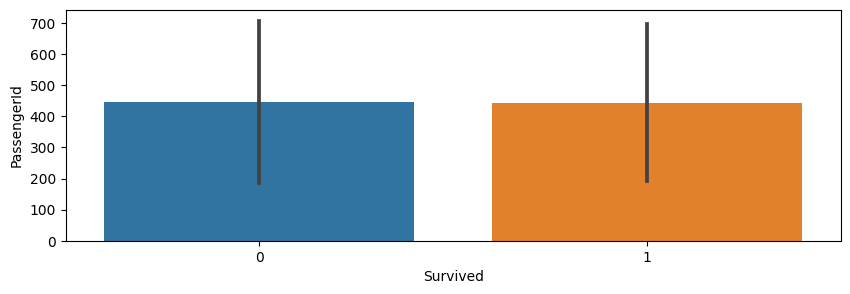

In [13]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='Survived',y='PassengerId',estimator='mean', errorbar=('sd'))

plt.show() 
## No correlation between passenger ID and survival

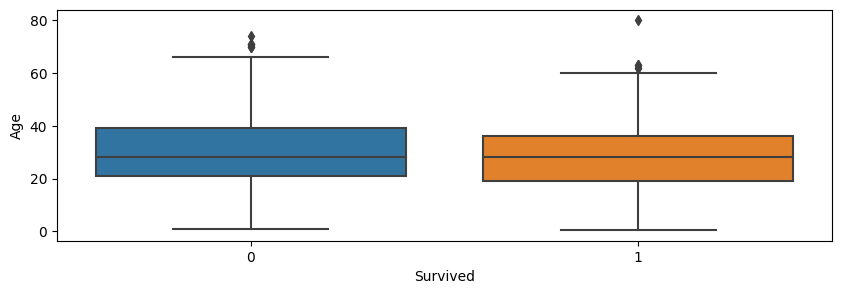

In [14]:
# explore the age
plt.figure(figsize=(10, 3))
sns.boxplot(x='Survived', y='Age', data=Train_data)
plt.show()
## no correlation between survival and age, just replace NA with average

In [15]:
# fill na in age with average value
Age_avg=Train_data['Age'].mean()
print(Age_avg)
Train_data['Age'].fillna(Age_avg, inplace=True)
Train_data.isna().sum()

29.69911764705882


/tmp/ipykernel_17/3479942869.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Train_data['Age'].fillna(Age_avg, inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

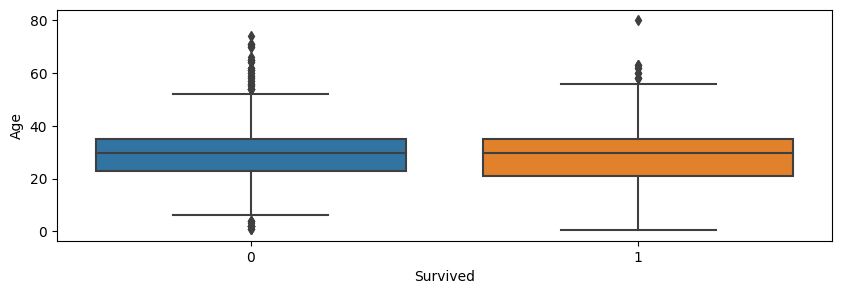

In [16]:
# re do box plot after fill NA in age column
plt.figure(figsize=(10, 3))
sns.boxplot(x='Survived', y='Age', data=Train_data)
plt.show() # no correlation

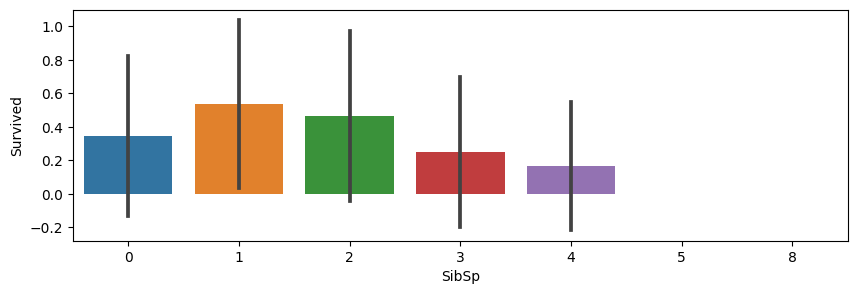

In [17]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='SibSp',y='Survived',estimator='mean', errorbar=('sd'))

plt.show() ## weak correlation between sibsp and survival

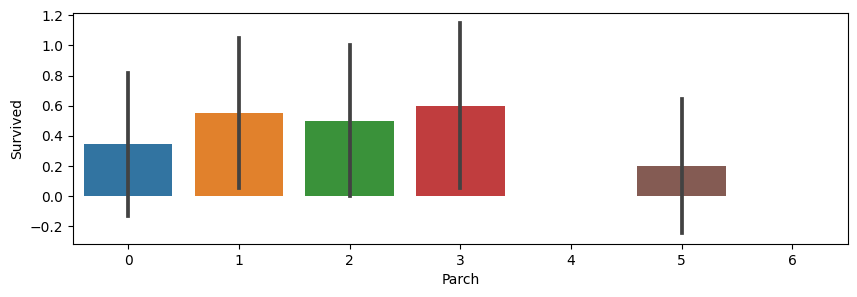

In [18]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='Parch',y='Survived',estimator='mean', errorbar=('sd'))

plt.show() ## weak correlation between Parch and survival

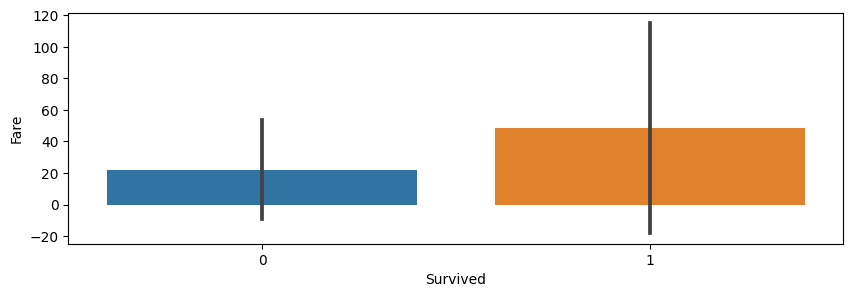

In [19]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='Survived',y='Fare',estimator='mean', errorbar=('sd'))

plt.show() ## strong correlation between fare and survival

In [20]:
Train_data['Ticket'].value_counts
# 891 unique ticket, unlikely to correlate with survival
## try to extract the ticket number and check the correlation with survival

<bound method IndexOpsMixin.value_counts of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object>

In [21]:
#extract the ticket number
df=Train_data[['Ticket','Survived']]
df['Ticket_No']=df['Ticket'].str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
df.head()

/tmp/ipykernel_17/2190644290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ticket_No']=df['Ticket'].str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


,Ticket,Survived,Ticket_No
0,A/5 21171,0,521171.0
1,PC 17599,1,17599.0
2,STON/O2. 3101282,1,23101282.0
3,113803,1,113803.0
4,373450,0,373450.0


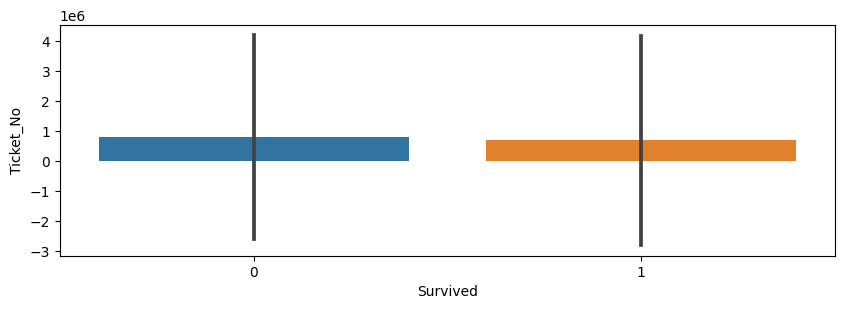

In [22]:
plt.figure(figsize=(10, 3))

sns.barplot(data=df, x='Survived',y='Ticket_No',estimator='mean', errorbar=('sd'))

plt.show() ## can not observe correlation

In [23]:
# assign 'unknown' to NA entry in Cabin column
Train_data['Cabin'].fillna('Unknown', inplace=True)
Train_data.isna().sum()

/tmp/ipykernel_17/2533214718.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Train_data['Cabin'].fillna('Unknown', inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Title          0
dtype: int64

In [24]:
#check the average survival rate of unknown Cabin
avg_Unknown = Train_data[Train_data['Cabin'] == 'Unknown']['Survived'].mean()
avg_Cabin= Train_data[Train_data['Cabin'] != 'Unknown']['Survived'].mean()
print(avg_Unknown, avg_Cabin)
# passengers with no record of Cabin number seem to have lower survival rate

0.29985443959243085 0.6666666666666666


In [25]:
#examine the correlation between cabin number and survival
Known_cabin=Train_data[Train_data['Cabin'] != 'Unknown']
Known_cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss


In [26]:
Known_cabin['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [27]:
Known_cabin['Cabin_No'] = Known_cabin['Cabin'].str.extract('(\d+)').astype('float64')

/tmp/ipykernel_17/2132579386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Known_cabin['Cabin_No'] = Known_cabin['Cabin'].str.extract('(\d+)').astype('float64')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


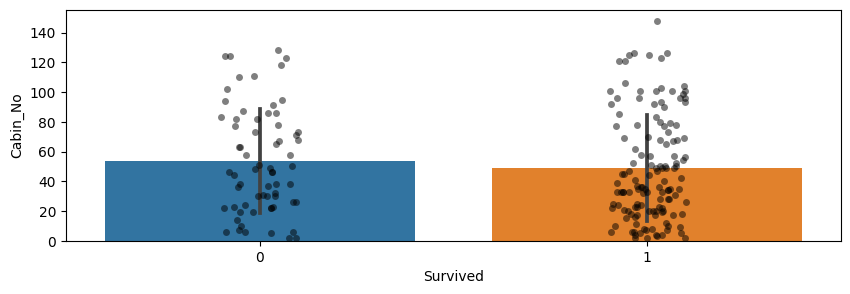

In [28]:
plt.figure(figsize=(10, 3))

sns.barplot(data=Known_cabin, x='Survived',y='Cabin_No',estimator='mean', errorbar=('sd'))
sns.stripplot(data=Known_cabin, x='Survived', y='Cabin_No', color='black', alpha=0.5, jitter=True)
plt.show() ## can not observe correlation

In [29]:
#convert cabin to binary input, 'unknown' as 0, others as 1
for i in Train_data.index:
    if Train_data.loc[i, 'Cabin']=='Unknown':
        Train_data.loc[i, 'Cabin']=0
    else:
        Train_data.loc[i, 'Cabin']=1

Train_data['Cabin'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: object>

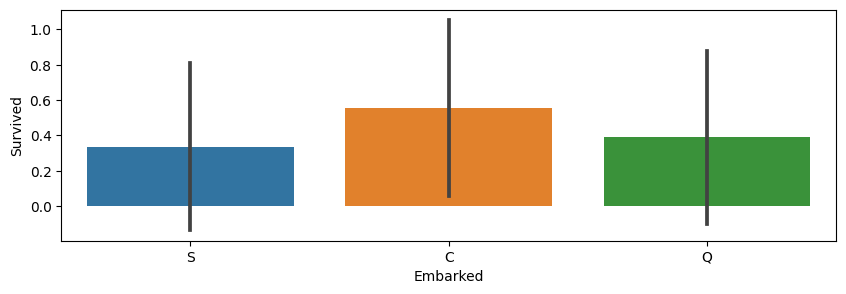

In [30]:
#last input Embarked
plt.figure(figsize=(10, 3))

sns.barplot(data=Train_data, x='Embarked',y='Survived',estimator='mean', errorbar=('sd'))

plt.show() ## There is correlation

In [31]:
Train_data[Train_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,1,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,1,NaN,Mrs


In [32]:
Train_data['Embarked'].fillna('S', inplace=True)
Train_data.isna().sum()

/tmp/ipykernel_17/1211471087.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Train_data['Embarked'].fillna('S', inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [33]:
Train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr


## Process test data following the same protocol

In [34]:
Test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [35]:
Test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [36]:
Test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
#assign values to NA based on above analysis
Test_data['Cabin'].fillna('Unknown', inplace=True) ## fill NA in Cabin with 'unknown'
test_age_ave=Test_data['Age'].mean()
Test_data['Age'].fillna(test_age_ave, inplace=True) ## fill NA in Age with average age
test_fare_ave=Test_data['Fare'].mean()
Test_data['Fare'].fillna(test_fare_ave, inplace=True) ## fill NA in Fare with average fare

/tmp/ipykernel_17/2261772797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Test_data['Cabin'].fillna('Unknown', inplace=True) ## fill NA in Cabin with 'unknown'
/tmp/ipykernel_17/2261772797.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [38]:
#convert cabin to binary input, 'unknown' as 0, others as 1
for i in Test_data.index:
    if Test_data.loc[i, 'Cabin']=='Unknown':
        Test_data.loc[i, 'Cabin']=0
    else:
        Test_data.loc[i, 'Cabin']=1

Test_data['Cabin'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Cabin, Length: 418, dtype: object>

In [39]:
Test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [40]:
#extract the titles from name
Test_data['Title']=Test_data.Name.str.extract(r'([A-Za-z]+)\.', expand=False)
Test_data.Title = Test_data.Title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Major', 
                                     'Rev', 'Sir', 'Jonkheer', 'Mlle','Ms','Mme','Dona'], 'Other')
Test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Other       6
Dr          1
Name: count, dtype: int64

In [41]:
Test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,Mrs


## Summary  in this new verion:
### Passenger ID, ticket number and age are excluded
### Pclass, parch, Embarked, sex, Sibsp, Fare, titles (from names) are strongly correlated with survival
### Status of Cabin information (known or unknown) seems to be correlated with survival
### Cabin was converted to binary feature

# ML training and prediction

## This version of model training used features: 'Pclass','Sex','SibSp','Parch','Fare','Embarked', 'Title','Cabin'


In [42]:

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# try at least two ML models
## low dimension, binary label
## decisiontree and KNN should be fit
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
## try logistic regression as well
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [43]:
# extract the input and output data
y=Train_data['Survived']
print(y.head())

## passengerid, name, ticket will not be used in the ML prediction
x_raw=Train_data[['Pclass','Sex','Cabin','SibSp','Parch','Embarked','Title','Fare']]
print(x_raw.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   Pclass     Sex Cabin  SibSp  Parch Embarked Title     Fare
0       3    male     0      1      0        S    Mr   7.2500
1       1  female     1      1      0        C   Mrs  71.2833
2       3  female     0      0      0        S  Miss   7.9250
3       1  female     1      1      0        S   Mrs  53.1000
4       3    male     0      0      0        S    Mr   8.0500


In [44]:
#convert char data to dummy data
x=pd.get_dummies(x_raw, columns=['Sex','Embarked','Title'])

# convert all dat to float type
x=x.astype('float64')
x.head()

,Pclass,Cabin,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3.0,0.0,1.0,0.0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,0.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.0,0.0,0.0,0.0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
# scale the data
transform = preprocessing.StandardScaler()
x_scaled=transform.fit_transform(x)

X_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

X_scaled_df.head()

,Pclass,Cabin,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0.827377,-0.544925,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.088986,-0.216803,-0.506655,0.850532,-0.403962,-0.151533
1,-1.566107,1.835115,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803,-0.088986,-0.216803,-0.506655,-1.175735,2.475480,-0.151533
2,0.827377,-0.544925,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.088986,-0.216803,1.973729,-1.175735,-0.403962,-0.151533
3,-1.566107,1.835115,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.088986,-0.216803,-0.506655,-1.175735,2.475480,-0.151533
4,0.827377,-0.544925,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.088986,-0.216803,-0.506655,0.850532,-0.403962,-0.151533


In [46]:
#use scaled data fro numeric features; unscaled data for binary features
#combine scaled and unscaled data
#Titles with limited numbers were not included
x_final=pd.concat([X_scaled_df[['Pclass','SibSp','Parch','Fare']], 
                   x[['Sex_female','Embarked_S','Embarked_Q','Cabin',
                      'Title_Mrs', 'Title_Mr', 'Title_Miss', 'Title_Master']]], 
                  axis=1)
x_final.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Embarked_S,Embarked_Q,Cabin,Title_Mrs,Title_Mr,Title_Miss,Title_Master
0,0.827377,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.566107,0.432793,-0.473674,0.786845,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.827377,-0.474545,-0.473674,-0.488854,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.566107,0.432793,-0.473674,0.420730,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.827377,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
#split train and test set
x_train, x_test, y_train, y_test=train_test_split(x_final, y, test_size=0.2,random_state=6)

### test different ML models

In [48]:
#test KNN model first
# initiate parameters
parameters = {'n_neighbors': [1,2,3,4,5,7,8,9,10, 11, 12, 13],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv=GridSearchCV(KNN, param_grid=parameters, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12,
                                         13],
                         'p': [1, 2]})

In [49]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'algorithm': 'auto', 'n_neighbors': 7, 'p': 2}
0.8257824726134585


In [50]:
#perform knn on the test data set
knn_cv.score(x_test, y_test) ## looks very promising

0.8044692737430168

In [51]:
#generate a function for confusion matrix
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not survived', 'survived']); ax.yaxis.set_ticklabels(['not survived', 'survived']) 
    plt.show() 

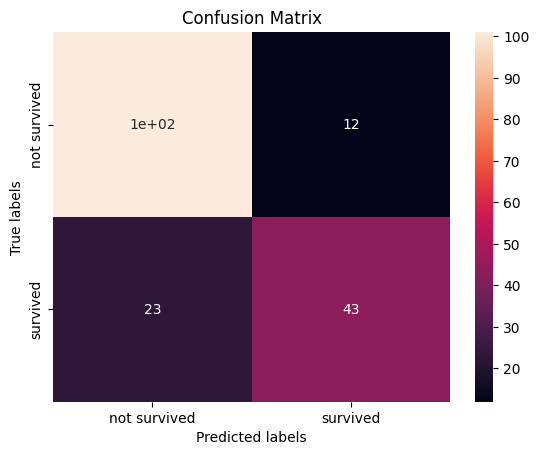

In [52]:
#confusion matrix for KNN model
yhat = knn_cv.predict(x_test)

plot_confusion_matrix(y_test, yhat) 

In [53]:
# try decision tree
## initiate parameters
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4,6,8,10,12],
     'min_samples_split': [2, 5, 10,12,16, 20]}

tree = DecisionTreeClassifier()

tree_cv=GridSearchCV(tree, param_grid=parameters, cv=10)
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 12],
                         'min_samples_split': [2, 5, 10, 12, 16, 20],
                         'splitter': ['best', 'random']})

In [54]:
print(tree_cv.best_params_)
print(tree_cv.best_score_)

{'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 20, 'splitter': 'random'}
0.8258411580594679


In [55]:
tree_cv.score(x_test, y_test) 

0.8491620111731844

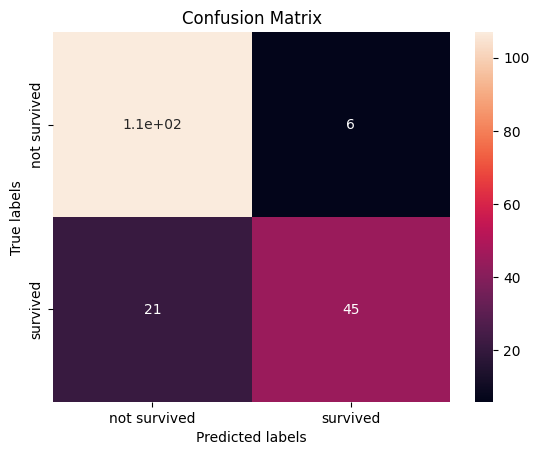

In [56]:
yhat = tree_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

In [57]:
#try logreg model
parameters ={"C":[0.05,0.1,0.16,0.17, 0.18,0.19,0.2],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, param_grid=parameters, cv=10)
logreg_cv.fit(x_train, y_train)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 0.19, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8004499217527388


In [58]:
logreg_cv.score(x_test, y_test) ## use logreg model for prediction in this version

0.8603351955307262

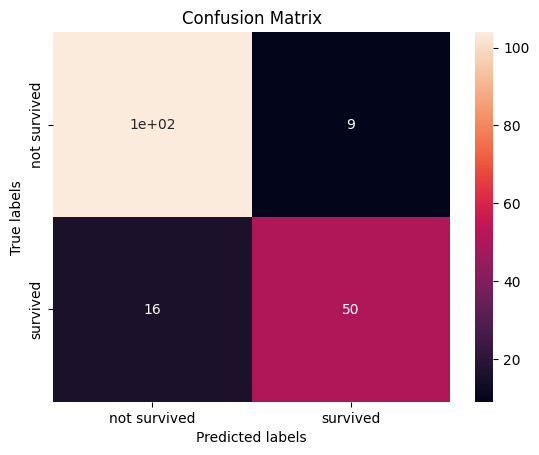

In [59]:
yhat = logreg_cv.predict(x_test)
plot_confusion_matrix(y_test,yhat)

### use logreg model for the final prediction

In [60]:
x_pre_raw=Test_data[['Pclass','Sex','SibSp','Parch','Embarked','Title','Cabin','Fare']]
print(x_pre_raw.head())

   Pclass     Sex  SibSp  Parch Embarked Title Cabin     Fare
0       3    male      0      0        Q    Mr     0   7.8292
1       3  female      1      0        S   Mrs     0   7.0000
2       2    male      0      0        Q    Mr     0   9.6875
3       3    male      0      0        S    Mr     0   8.6625
4       3  female      1      1        S   Mrs     0  12.2875


In [61]:
#get dummies
x_pre=pd.get_dummies(x_pre_raw, columns=['Sex','Embarked','Title'])
x_pre=x_pre.astype('float64')
x_pre.head()

# scale the data
x_scaled_pre=transform.fit_transform(x_pre)

X_pre_df = pd.DataFrame(x_scaled_pre, columns=x_pre.columns)

X_pre_df.head()

#combine scaled and unscaled data
x_final_pre=pd.concat([X_pre_df[['Pclass','SibSp','Parch','Fare']], 
                   x_pre[['Sex_female','Embarked_S','Embarked_Q','Cabin',
                      'Title_Mrs', 'Title_Mr', 'Title_Miss', 'Title_Master']]],  
                  axis=1)
x_final_pre.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Embarked_S,Embarked_Q,Cabin,Title_Mrs,Title_Mr,Title_Miss,Title_Master
0,0.873482,-0.499470,-0.400248,-0.498407,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.873482,0.616992,-0.400248,-0.513274,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.315819,-0.499470,-0.400248,-0.465088,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.873482,-0.499470,-0.400248,-0.483466,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.873482,0.616992,0.619896,-0.418471,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
#redo the model training with the whole training data set
logreg_cv.fit(x_final, y)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 0.2, 'penalty': 'l2', 'solver': 'lbfgs'}
0.8125468164794007


In [63]:
#use logreg for prediction
y_pre=logreg_cv.predict(x_final_pre)
final_df=Test_data[['PassengerId']]
final_df['Survived']=y_pre
final_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [64]:
#save the data
final_df.to_csv('submission', index=False)